# Support Vector Machines (SVM) with Kernel Function for Face Detection

Support Vector Machines (SVM) are powerful supervised learning models that can be used for classification and regression tasks. When it comes to face detection, SVMs can be particularly effective due to their ability to find optimal decision boundaries between classes (face vs. non-face). To handle non-linearly separable data, we use SVMs with kernel functions, which map the input data into higher-dimensional spaces where it becomes easier to separate the classes.

Here is a step-by-step guide on how to use SVM with a kernel function for face detection:

- Data Preparation: Gather a dataset of labeled face and non-face images. Each image should be labeled as either a face (positive class) or non-face (negative class). 
- Feature Extraction: Extract features from the images. Commonly used features for face detection include Haar features, Histogram of Oriented Gradients (HOG), or raw pixel values. 
- Feature Scaling: Normalize the feature vectors to have zero mean and unit variance to ensure that the SVM treats all features equally. 
- Choosing the Kernel Function: Linear Kernel: Suitable for linearly separable data. Polynomial Kernel: Useful when the relationship between classes is polynomial. Radial Basis Function (RBF) Kernel: Commonly used for non-linear data; it maps data into higher-dimensional space using a Gaussian function. 

- Training the SVM: Split the dataset into training and testing sets. Use the training set to train the SVM model with the chosen kernel function. Model Evaluation:

- Evaluate the model using the testing set. Common metrics include accuracy, precision, recall, and the F1 score. Face Detection:

- Use the trained SVM model to classify new image patches as face or non-face. 

Below is a Python code example using scikit-learn to train an SVM with an RBF kernel for classifying face images into different classes, where each class represents a specific person in the Olivetti Faces dataset.

Let's break down the code step by step:

- Import Libraries:
  - numpy: Library for numerical computing.
  - matplotlib.pyplot: Library for creating plots and visualizations.
  - sklearn.datasets.fetch_olivetti_faces: Function to load the Olivetti faces dataset.
  - sklearn.svm: Support Vector Machine (SVM) classifier.
  - sklearn.metrics: Module for performance evaluation metrics.
  - sklearn.model_selection: Module for model selection and evaluation.
  - sklearn.decomposition.PCA: Principal Component Analysis (PCA) for dimensionality reduction.
  - sklearn.pipeline.make_pipeline: Utility function for creating a pipeline of estimators.
  - sklearn.preprocessing.StandardScaler: Standardizes features by removing the mean and scaling to unit variance.

- Load Olivetti Faces Dataset: fetch_olivetti_faces function to load the Olivetti faces dataset. The dataset contains grayscale images of faces of 40 different people, with 10 images per person.

- Data Preprocessing:
  - X: Contains the pixel values of the images.
  - y: Contains the target labels (indices of the people).
  - target_names: Names of the target labels (indices from 0 to 39).
  - n_classes: Number of unique classes (40 in this case).

- Split the dataset into training and testing sets using train_test_split.

- Feature Scaling: Standardize features using StandardScaler to remove the mean and scale to unit variance.

- Dimensionality Reduction: Perform PCA (Principal Component Analysis) for dimensionality reduction. Reduce the number of features to n_components (150 in this case) using PCA.

- SVM Model Initialization: Create an SVM classifier with an RBF (Radial Basis Function) kernel using SVC.

- Model Training: Fit the SVM model to the training data (X_train_pca, y_train).

- Model Evaluation: Predict on the test set (X_test_pca).

- Evaluate the model using classification metrics such as precision, recall, and F1-score.

- Print the classification report and accuracy score.

- Visualization: Define functions plot_gallery and title to plot images and their predicted and true labels. Plot a portion of the test set with the predicted and true labels using plot_gallery.

- Display Results: Show the plot with the predicted and true labels for the test set.

Overall, this code demonstrates how to load the Olivetti faces dataset, preprocess the data, train an SVM classifier with PCA for dimensionality reduction, evaluate the model, and visualize the results.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1986: UserWarning: labels size, 39, does not match size of target_names, 40
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.38      0.55         8
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         2
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    

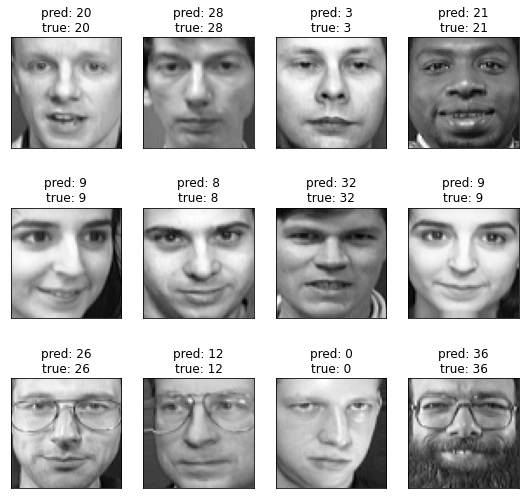

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the Olivetti faces dataset
olivetti_faces = fetch_olivetti_faces()

# For machine learning we use the data directly (as relative pixel positions info is ignored by this model)
X = olivetti_faces.data  # the pixel values
y = olivetti_faces.target  # the target labels
target_names = [str(i) for i in range(40)]  # target names are the indices from 0 to 39
n_classes = len(target_names)

# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality reduction with PCA (for visualization and speed-up)
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train_scaled)

# Apply PCA transformation
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create SVM model with RBF kernel
clf = svm.SVC(kernel='rbf', class_weight='balanced', gamma='scale')

# Train the SVM model
clf.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred, labels=np.unique(y_test), target_names=target_names))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Function to plot images
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Plot the result of the prediction on a portion of the test set
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]]
    true_name = target_names[y_test[i]]
    return 'pred: %s\ntrue: %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, olivetti_faces.images.shape[1], olivetti_faces.images.shape[2])

plt.show()
